In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

In [2]:
titles = 'filename width height cell_type xmin ymin xmax ymax'.split()
data = pd.read_csv('Annotations_labels.csv')
data.columns = titles
data.head(30)

,filename,width,height,cell_type,xmin,ymin,xmax,ymax
0,BloodImage_00000.jpg,640,480,WBC,260,177,491,376
1,BloodImage_00000.jpg,640,480,RBC,78,336,184,435
2,BloodImage_00000.jpg,640,480,RBC,63,237,169,336
3,BloodImage_00000.jpg,640,480,RBC,214,362,320,461
4,BloodImage_00000.jpg,640,480,RBC,414,352,506,445
5,BloodImage_00000.jpg,640,480,RBC,555,356,640,455
6,BloodImage_00000.jpg,640,480,RBC,469,412,567,480
7,BloodImage_00000.jpg,640,480,RBC,1,333,87,437
8,BloodImage_00000.jpg,640,480,RBC,4,406,95,480
9,BloodImage_00000.jpg,640,480,RBC,155,74,247,174


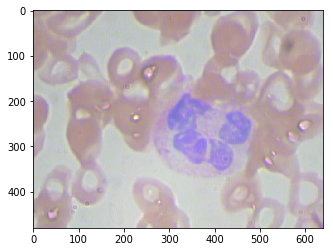

In [3]:
image = plt.imread('BCCD_Dataset/BCCD/JPEGImages/BloodImage_00000.jpg')
plt.imshow(image)

In [4]:
# Number of unique training images
data['filename'].nunique()

364

In [5]:
# Number of classes
data['cell_type'].value_counts()

RBC          4155
WBC           372
Platelets     361
Name: cell_type, dtype: int64

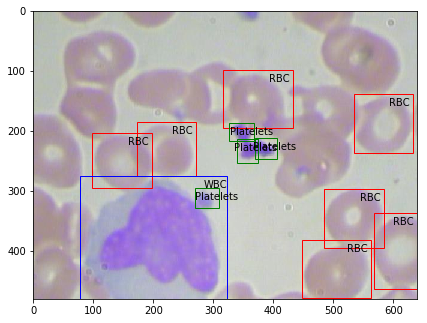

In [6]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('BCCD_Dataset/BCCD/JPEGImages/BloodImage_00312.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in data[data.filename == "BloodImage_00312.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.cell_type == 'RBC':
        edgecolor = 'r'
        ax.annotate('RBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
        ax.annotate('WBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
        ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

## Convert data from .csv to .txt

In [7]:
df = pd.DataFrame()
df['format'] = data['filename']

# as the images are in train_images folder, add train_images before the image name
for i in range(df.shape[0]):
    df['format'][i] = 'train_images/' + df['format'][i]

# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(df.shape[0]):
    df['format'][i] = df['format'][i] + ',' + str(data['xmin'][i]) + ',' + str(data['ymin'][i]) + ',' + str(data['xmax'][i]) + ',' + str(data['ymax'][i]) + ',' + data['cell_type'][i]

df.to_csv('annotate.txt', header=None, index=None, sep=' ')